<a href="https://colab.research.google.com/github/TahNaken/-helloworld_jan_22/blob/main/nlp_project_low_code_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_____' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_____' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

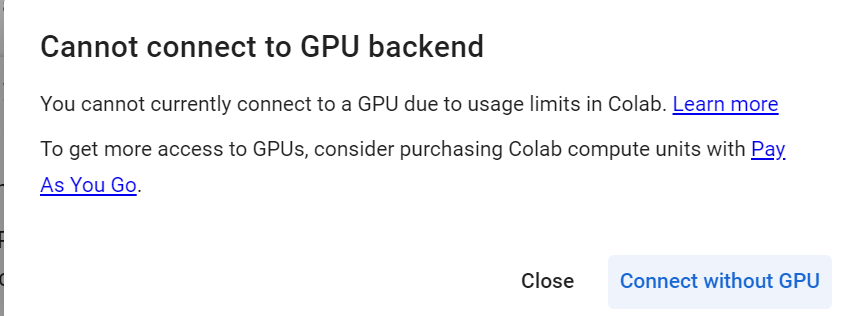

## **Installing and Importing the necessary libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.7/268.7 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00


In [3]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To parse JSON data
import json

# To build, tune, and evaluate ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [4]:
# # uncomment and run the following code if Google Colab is being used and the dataset is in Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
stock_news = pd.read_csv("/content/stock_news (4).csv") # Complete the code to read the CSV file.

In [7]:
#Creating a copy of the dataset
stock = stock_news.copy()

## **Data Overview**

### Displaying the first few rows of the dataset

In [8]:
stock.head() # Complete the code to check the first 5 rows of the data

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


### Understanding the shape of the dataset

In [9]:
stock.shape # Complete the code to check the shape of the data

(349, 8)

### Checking the data types of the columns

In [10]:
stock.dtypes # Complete the code to check the data types

,0
Date,object
News,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Label,int64


In [11]:
stock['Date'] = pd.to_datetime(stock['Date'])  # to convert the 'Date' column in the 'stock' DataFrame to datetime format.

### Checking the statistical summary

In [12]:
stock.describe() # Complete the code to check the statistical summary

,Date,Open,High,Low,Close,Volume,Label
count,349,349.000000,349.000000,349.000000,349.000000,3.490000e+02,349.000000
mean,2019-02-16 16:05:30.085959936,46.229233,46.700458,45.745394,44.926317,1.289482e+08,-0.054441
min,2019-01-02 00:00:00,37.567501,37.817501,37.305000,36.254131,4.544800e+07,-1.000000
25%,2019-01-14 00:00:00,41.740002,42.244999,41.482498,40.246914,1.032720e+08,-1.000000
50%,2019-02-05 00:00:00,45.974998,46.025002,45.639999,44.596924,1.156272e+08,0.000000
75%,2019-03-22 00:00:00,50.707500,50.849998,49.777500,49.110790,1.511252e+08,0.000000
max,2019-04-30 00:00:00,66.817497,67.062500,65.862503,64.805229,2.444392e+08,1.000000
std,NaN,6.442817,6.507321,6.391976,6.398338,4.317031e+07,0.715119


### Checking the duplicate values

In [13]:
stock.duplicated() #Complete the code to check the duplicate values

,0
0,False
1,False
2,False
3,False
4,False
...,...
344,False
345,False
346,False
347,False


### Checking for missing values

In [14]:
stock.isnull().sum() # Complete the code to check for missing values in the data

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


## **Exploratory Data Analysis**

### Univariate Analysis

#### Observations on Label

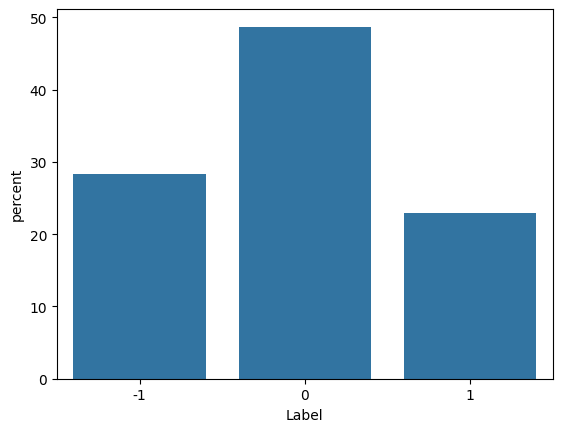

In [15]:
sns.countplot(data=stock, x="Label", stat="percent");

* The dataset is slightly imbalanced for the sentiment ploarities.
* There is more news content with polarity compared to other types.


#### Density Plot of Price (Open,High,Low,Close)

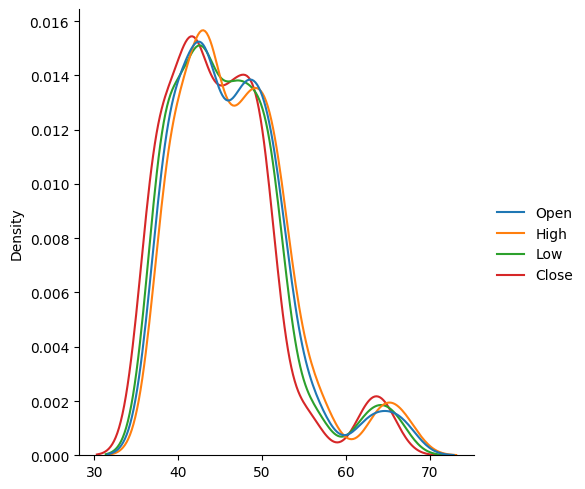

In [16]:
sns.displot(data=stock[["Open", "High", "Low", "Close"]], kind="kde", palette="tab10"); # Complete the code to plot a density plot of ["Open","High","Low","Close"] all in a single plot

* The distributions of the prices are quite similar, with the high price showing variation than the others

#### Observations on Volume

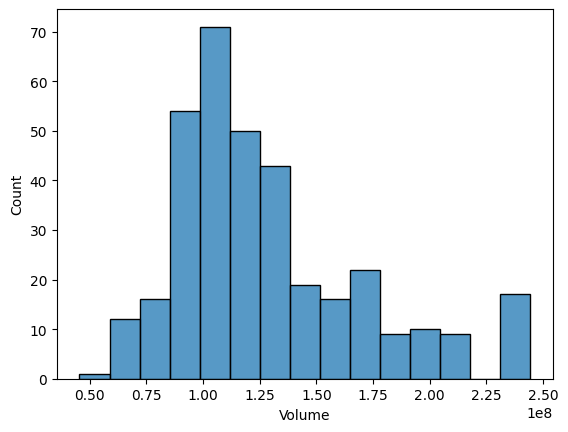

In [17]:
sns.histplot(stock, x='Volume'); # Complete the code to plot a histogram of Volume

* In a large portion of the time considered, 80 t0 175 million shares of the stock were traded with occasional days where the volume rose to more than 200 million.

#### Observations on News length

In [18]:
#Calculating the total number of words present in the news content.
stock['news_len'] = stock['News'].apply(lambda x: len(x.split(' ')))


stock['news_len'].describe()    #Complete the code to print the statistical summary for the news content length

,news_len
count,349.000000
mean,49.312321
std,5.727770
min,19.000000
25%,46.000000
50%,50.000000
75%,53.000000
max,61.000000


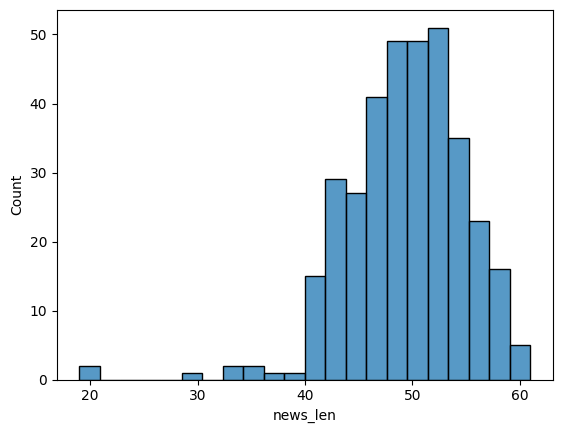

In [19]:
sns.histplot(data=stock,x="news_len"); #Complete the code to plot a histogram of news_len column

* More of the news have between 40-60 words, with an average of 50 words.
* The shortest news has 19 words
* This indicates that these are likely to be news summaries rather than the actual news content itself.

### Bivariate Analysis

#### Correlation

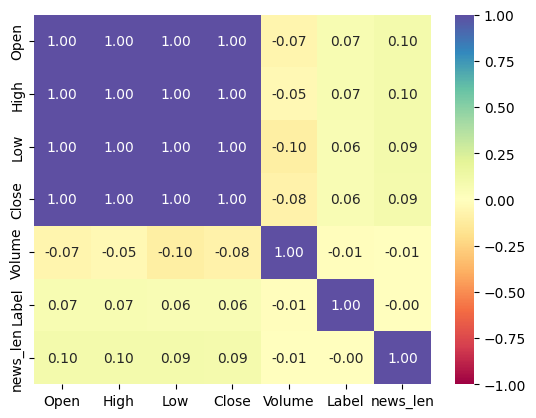

In [20]:
sns.heatmap(
    stock.select_dtypes(include="number").corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);    #Complete the code to plot the correlation matrix for numeric columns only.

* Thr prices are all perfectly correlated. This might be due to the minmum variation between the different prices.
* There is a negative correlation albeilt very low between volume and prices. This might be due to selling pressure during periods of negative sentiment.

#### Label vs Price (Open, High, Low, Close)

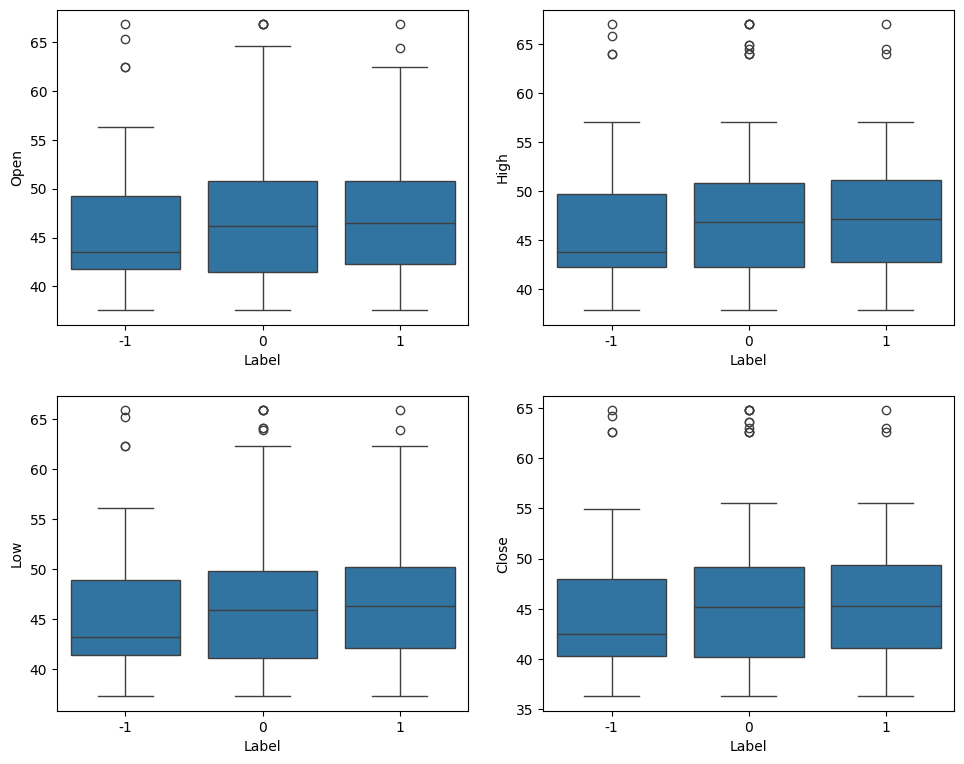

In [21]:
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=stock, x="Label", y=variable)
    plt.tight_layout(pad=2)

plt.show()

• The median for all prices is lower for negative sentiment polarity news than other sentiment polarities, clearly indicating that negative news drags the stock price lower as investors might be selling off their shares in response to the negative news.
• The higher upper whisker for the open price in neutral sentiment news compared to positive sentiment indicates more variability in how the market opens when neutral news is encountered. This could be due to different people interpreting the news differently, leading to a wider range of opening prices.

#### Label vs Volume

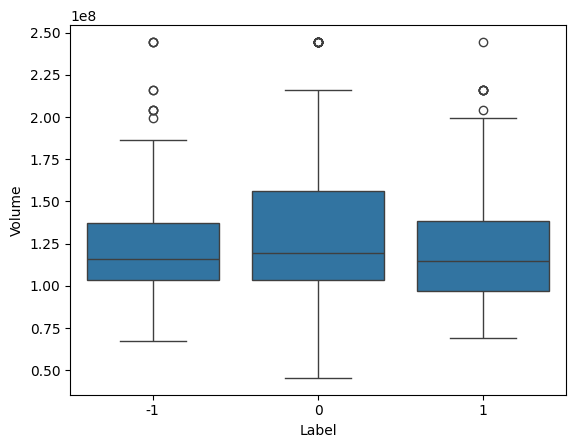

In [22]:
sns.boxplot(
    data=stock, x="Label", y="Volume"  # Complete the code to plot a boxplot of Label vs Volume
);

* The median trading volume for the stock is approximately the same across all sentiment polarities.
* The volumes for neutral sentiment news have a wider spread, indicating potential uncertainty among investors due to varied interpretations, leading to varied reactions

#### Date vs Price (Open, High, Low, Close)

In [23]:
stock_daily = stock.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Group the 'stocks' DataFrame by the 'Date' column

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,41.740002,42.244999,41.482498,40.246914,130672400.0
2019-01-03,43.570000,43.787498,43.222500,42.470604,103544800.0
2019-01-04,47.910000,47.919998,47.095001,46.419842,111448000.0
2019-01-07,50.792500,51.122501,50.162498,49.110790,109012000.0
2019-01-08,53.474998,54.507500,51.685001,50.787209,216071600.0


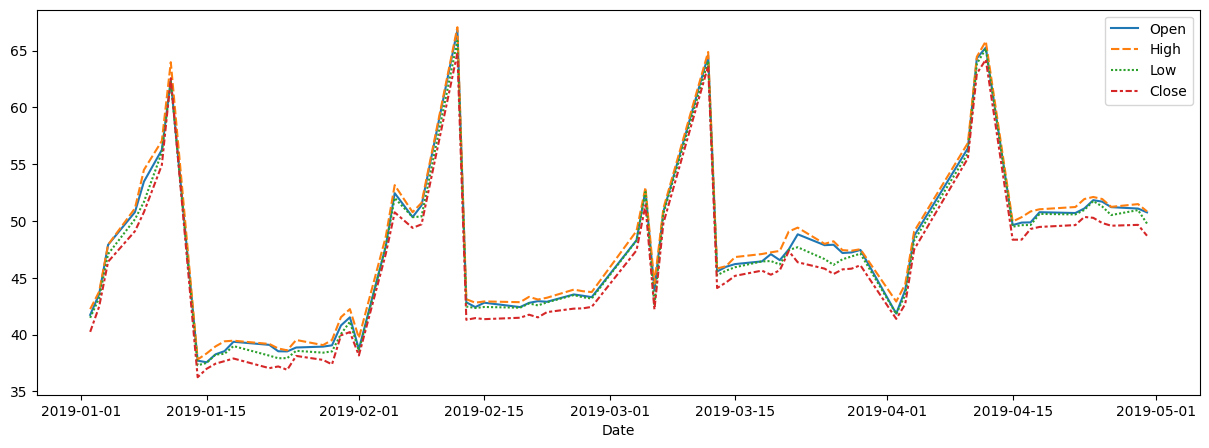

In [24]:
plt.figure(figsize=(15,5))
sns.lineplot(stock_daily.drop("Volume", axis=1)); #Complete the code to plot a lineplot of all the variables except Volume

* We can observe a seasonal trend in the prices - a repetitive pattern every month.
* The stock price has gradually increased over time from -$40 to --850 in the period for which the data is available

#### Volume vs Close Price

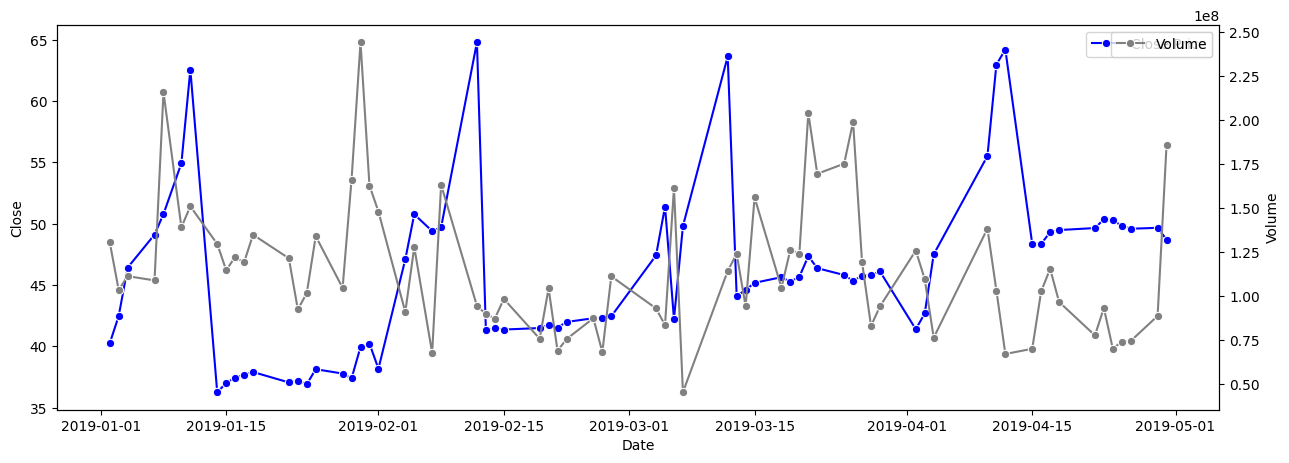

In [25]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1));

* There is no specific patter here There have been periods where the price decreased with increasing volumes There have been periods where the price increased with increasing volumes

## **Data Preprocessing**

In [28]:
stock["Date"].describe() #Complete the code to print the statistical summary of the 'Date' column

,Date
count,349
mean,2019-02-16 16:05:30.085959936
min,2019-01-02 00:00:00
25%,2019-01-14 00:00:00
50%,2019-02-05 00:00:00
75%,2019-03-22 00:00:00
max,2019-04-30 00:00:00


### Train-test-validation Split

In [29]:
X_train = stock[(stock['Date'] < '2019-04-01')].reset_index()    #Complete the code to select all rows where the 'Date' is before '2019-04-01'
X_val = stock[(stock['Date'] >= '2019-04-01') & (stock['Date'] < '2019-04-16')].reset_index()    #Complete the code to select all rows where the 'Date' is from '2019-04-01 to '2019-04-16' (excluded)
X_test = stock[stock['Date'] >= '2019-04-16'].reset_index()    #Complete the code to select all rows where the 'Date' is from '2019-04-16' till the end.

In [32]:
# Complete the code to pick the 'Label' column as the target variable
y_train = X_train["Label"].copy()
y_val = X_val["Label"].copy()
y_test = X_test["Label"].copy()

In [31]:
#Complete the code to print the shape of X_train,X_val,X_test,y_train,y_val and y_test
print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (286, 10)
Validation data shape (21, 10)
Test data shape  (42, 10)
Train label shape (286,)
Validation label shape (21,)
Test label shape  (42,)


## **Word Embeddings**

### Word2Vec

In [33]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in stock['News'].values]

In [34]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [35]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 4682


Let's check out a few word embeddings obtained using the model.

In [36]:
# Checking the word embedding of a random word
word = "stock"
model_W2V.wv[word]

array([ 0.00370023,  0.0432932 ,  0.00592362,  0.02394838, -0.00356996,
       -0.05031741,  0.03528652,  0.08430905,  0.00978312, -0.0151526 ,
        0.01193833, -0.02257084,  0.00099546,  0.01178115, -0.02947916,
       -0.02520835,  0.02157305, -0.01249826, -0.00227318, -0.01359106,
       -0.02752618,  0.00304731,  0.03711588,  0.00773774,  0.01477179,
        0.00611099, -0.04478414,  0.00625998, -0.01784755, -0.03541681,
        0.0142472 , -0.02179463,  0.00333836, -0.00309373, -0.0051026 ,
        0.01661513,  0.01732616, -0.03830538,  0.00180841, -0.01058179,
       -0.0161409 , -0.00148517, -0.00204627, -0.02618074,  0.01594203,
        0.03981584, -0.00016744,  0.0101399 , -0.00205637,  0.02724667,
        0.02022245,  0.00536364, -0.0163899 ,  0.0130246 , -0.01105395,
        0.02733034,  0.013483  ,  0.00431826,  0.0155806 , -0.0050354 ,
       -0.0070124 , -0.0165052 ,  0.00015765,  0.01100716,  0.00573038,
        0.01447323,  0.00159109,  0.01482937, -0.02268766, -0.00

In [37]:
# Checking the word embedding of a random word
word = "economy"
model_W2V.wv[word]

array([ 2.49808934e-03,  6.26855809e-03,  7.56533409e-05,  3.54283606e-03,
       -2.51710648e-03, -8.51885788e-03,  8.53989553e-03,  1.55788986e-02,
        4.36451461e-04, -1.34873565e-03,  2.49113305e-03, -4.58143512e-03,
        7.04367063e-04,  1.97224808e-03, -4.85670613e-03, -3.28201940e-03,
        2.34375848e-03, -3.32972594e-03, -6.18940219e-04, -3.88689502e-03,
       -1.30333111e-03,  1.70377444e-03,  5.16460044e-03,  2.34557595e-03,
        4.57154447e-03,  1.60401792e-03, -4.61621257e-03, -1.36112701e-03,
       -2.38988851e-03, -5.68085629e-03,  3.00698727e-03, -2.08295602e-03,
        3.13956756e-03, -1.74965465e-03,  1.29390144e-04,  3.50019080e-03,
        1.49135001e-03, -2.93721398e-03,  5.55569946e-04, -1.79246243e-03,
       -4.70981468e-03,  5.37584943e-04,  1.30302866e-03, -5.14454255e-03,
       -1.05938723e-03,  6.73072319e-03, -1.71718898e-03,  4.95133828e-03,
       -2.86470866e-03,  5.86471986e-03,  6.77759934e-04, -1.03448343e-04,
       -2.27075838e-03,  

In [38]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [39]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [40]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_wv = pd.DataFrame(X_train["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  0.6536293029785156


In [41]:
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

(286, 300) (21, 300) (42, 300)


### GloVe

In [42]:
filename = 'glove.6B.100d.txt.word2vec' # # load the Stanford GloVe model

In [43]:
filename = 'glove.6B.100d.txt' # Removed .word2vec extension

In [44]:
!pip install gensim
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

import gensim
from gensim.models import KeyedVectors
import numpy as np
import pandas as pd
import time

# ... (Rest of your code remains the same) ...

# load the Stanford GloVe model
filename = 'glove.6B.100d.txt' # Corrected filename
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False, no_header=True) # Load as text file with no headeer

# ... (Rest of your code remains the same) ...

--2024-11-17 22:24:59--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-17 22:24:59--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-17 22:25:00--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [45]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


Let's check out a few word embeddings.

In [46]:
# Checking the word embedding of a random word
word = "stock"
glove_model[word]

array([ 8.6341e-01,  6.9648e-01,  4.5794e-02, -9.5708e-03, -2.5498e-01,
       -7.4666e-01, -2.2086e-01, -4.4615e-01, -1.0423e-01, -9.9931e-01,
        7.2550e-02,  4.5049e-01, -5.9912e-02, -5.7837e-01, -4.6540e-01,
        4.3429e-02, -5.0570e-01, -1.5442e-01,  9.8250e-01, -8.1571e-02,
        2.6523e-01, -2.3734e-01,  9.7675e-02,  5.8588e-01, -1.2948e-01,
       -6.8956e-01, -1.2811e-01, -5.2265e-02, -6.7719e-01,  3.0190e-02,
        1.8058e-01,  8.6121e-01, -8.3206e-01, -5.6887e-02, -2.9578e-01,
        4.7180e-01,  1.2811e+00, -2.5228e-01,  4.9557e-02, -7.2455e-01,
        6.6758e-01, -1.1091e+00, -2.0493e-01, -5.8669e-01, -2.5375e-03,
        8.2777e-01, -4.9102e-01, -2.6475e-01,  4.3015e-01, -2.0516e+00,
       -3.3208e-01,  5.1845e-02,  5.2646e-01,  8.7452e-01, -9.0237e-01,
       -1.7366e+00, -3.4727e-01,  1.6590e-01,  2.7727e+00,  6.5756e-02,
       -4.0363e-01,  3.8252e-01, -3.0787e-01,  5.9202e-01,  1.3468e-01,
       -3.3851e-01,  3.3646e-01,  2.0950e-01,  8.5905e-01,  5.18

In [48]:
# Checking the word embedding of a random word
word = "economy"
glove_model[word]

array([-0.19382  ,  1.017    ,  1.076    ,  0.02954  , -0.39192  ,
       -1.3891   , -0.87873  , -0.63162  ,  0.9643   , -0.43035  ,
       -0.34868  ,  0.22736  , -0.40296  ,  0.15641  , -0.16813  ,
       -0.15343  , -0.15799  , -0.27612  ,  0.18088  , -0.28386  ,
        0.49847  ,  0.29864  ,  0.32353  ,  0.18108  , -0.59623  ,
       -0.54165  , -0.70019  , -0.64956  , -0.69063  ,  0.18084  ,
       -0.38581  ,  0.56086  , -0.40313  , -0.38777  , -0.70615  ,
        0.20657  ,  0.34171  , -0.23393  , -0.35882  , -0.2201   ,
       -0.76182  , -1.2047   ,  0.4339   ,  1.1656   ,  0.1836   ,
       -0.21601  ,  0.93198  , -0.059616 , -0.11624  , -1.3259   ,
       -0.79772  , -0.0074957, -0.0889   ,  1.4749   ,  0.31157  ,
       -2.2952   , -0.058351 ,  0.39353  ,  1.4983   ,  0.74023  ,
       -0.20109  ,  0.098124 , -0.73081  , -0.32294  ,  0.16703  ,
        0.87431  , -0.041624 , -0.51022  ,  1.0737   , -0.4257   ,
        1.0581   ,  0.19859  , -0.60087  , -0.33906  ,  0.6024

In [49]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [50]:
vec_size=100

In [51]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [54]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_gl = pd.DataFrame(X_train["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
X_val_gl = pd.DataFrame(X_val["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
X_test_gl = pd.DataFrame(X_test["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column

end = time.time()
print('Time taken ', (end-start))

Time taken  41.37967133522034


In [53]:
print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape) #Complete the code to print the shapes of the final dataframes

(286, 100) (21, 100) (42, 100)


### Sentence Transformer

#### Defining the model

In [55]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### Encoding the dataset

In [56]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [57]:
# encoding the dataset
start = time.time()

X_train_st = model.encode(X_train["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column
X_val_st = model.encode(X_val["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column
X_test_st = model.encode(X_test["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column

end = time.time()
print("Time taken ",(end-start))

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken  13.05622386932373


In [58]:
print(X_train_st.shape, X_val_st.shape, X_test_st.shape) #Complete the code to print the shapes of the final dataframes

(286, 384) (21, 384) (42, 384)


- Each news content has been converted to a 384-dimensional vector.

## **Sentiment Analysis**

### Model Evaluation Criterion

-


### Utility Functions

In [59]:
def plot_confusion_matrix(model, predictors, target):
    """
    Plot a confusion matrix to visualize the performance of a classification model.

    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.

    Returns:
    None: Displays the confusion matrix plot.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.

    plt.figure(figsize=(5, 4))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.

    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display the plot.

In [60]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    return df_perf  # Return the DataFrame with the metrics.

### Base Model - Word2Vec

In [61]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data

#base_wv = GradientBoostingClassifier(random_state = 42)
#base_wv = RandomForestClassifier(random_state=42)
base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_wv, y_train)

DecisionTreeClassifier(random_state=42)

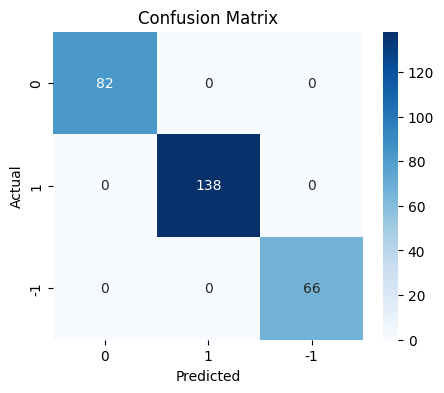

In [62]:
plot_confusion_matrix(base_wv,X_train_wv,y_train)

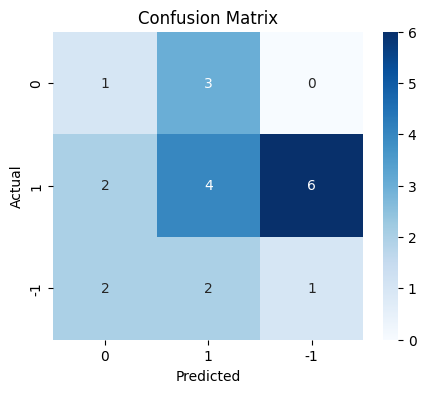

In [63]:
plot_confusion_matrix(base_wv,X_val_wv,y_val)

In [64]:
#Calculating different metrics on training data
base_train_wv = model_performance_classification_sklearn(base_wv,X_train_wv,y_train)
print("Training performance:\n", base_train_wv)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [65]:
#Calculating different metrics on validation data
base_val_wv = model_performance_classification_sklearn(base_wv,X_val_wv,y_val)
print("Validation performance:\n",base_val_wv)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.285714  0.285714   0.326077  0.299698


### Base Model - GloVe

In [66]:
#Building the model

#Uncomment only one of the snippets related to fitting the model to the data

#base_wv = GradientBoostingClassifier(random_state = 42)
#base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_gl, y_train) #Complete the code to fit the chosen model on the train data

DecisionTreeClassifier(random_state=42)

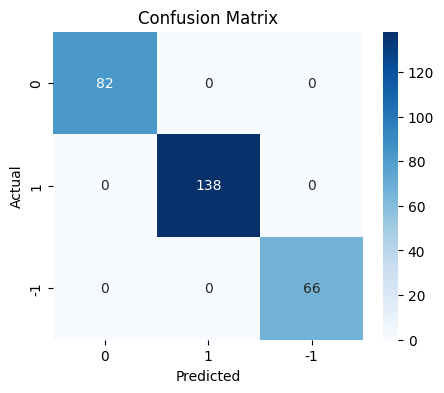

In [67]:
plot_confusion_matrix(base_wv, X_train_gl, y_train) #Complete the code to plot the confusion matrix for the train data

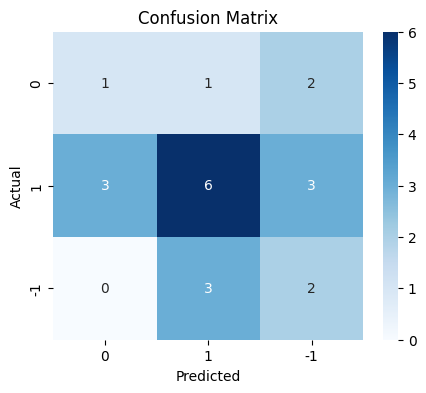

In [68]:
plot_confusion_matrix(base_wv, X_val_gl, y_val) #Complete the code to plot the confusion matrix for the validation data

In [69]:
#Calculating different metrics on training data
base_train_gl=model_performance_classification_sklearn(base_wv, X_train_gl, y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n", base_train_gl)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [70]:
#Calculating different metrics on validation data
base_val_gl = model_performance_classification_sklearn(base_wv, X_val_gl, y_val) #Complete the code to compute the model performance for the validation data
print("Validation performance:\n",base_val_gl)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.428571  0.428571   0.458503  0.438672


### Base Model - Sentence Transformer

In [71]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data

#base_wv = GradientBoostingClassifier(random_state = 42)
#base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_st, y_train) #Complete the code to fit the chosen model on the train data

DecisionTreeClassifier(random_state=42)

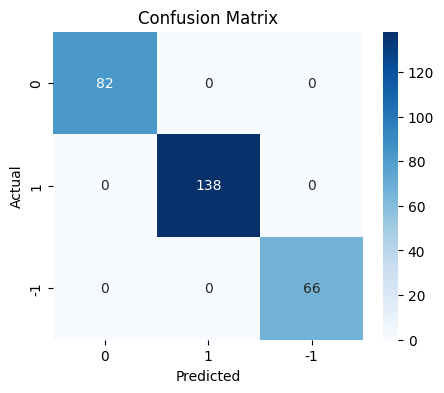

In [72]:
plot_confusion_matrix(base_wv, X_train_st, y_train) #Complete the code to plot the confusion matrix for the train data

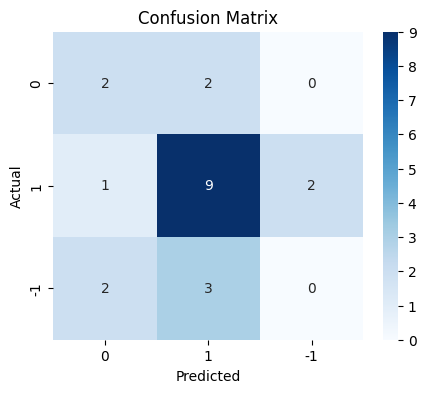

In [73]:
plot_confusion_matrix(base_wv, X_val_st, y_val) #Complete the code to plot the confusion matrix for the validation data

In [74]:
#Calculating different metrics on training data
base_train_st=model_performance_classification_sklearn(base_wv, X_train_st, y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n", base_train_st)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [75]:
#Calculating different metrics on validation data
base_val_st = model_performance_classification_sklearn(base_wv, X_val_st, y_val) #Complete the code to compute the model performance for the validation data
print("Validation performance:\n",base_val_st)

Validation performance:
    Accuracy   Recall  Precision       F1
0   0.52381  0.52381   0.443537  0.48026


### Tuned Model - Word2Vec

**Note**: The parameter grid provided below is a sample grid. It can be modified depending on the compute power of the system being used.

In [77]:
start = time.time()

# Choose the type of classifier.

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
#tuned_wv = RandomForestClassifier(random_state=42)
tuned_wv = DecisionTreeClassifier(random_state=42)


parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_wv, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_wv = grid_obj.best_estimator_

Time taken  4.27036714553833


In [78]:
# Fit the best algorithm to the data.
tuned_wv.fit(X_train_wv, y_train)

DecisionTreeClassifier(max_depth=5, max_features=0.4, min_samples_split=9,
                       random_state=42)

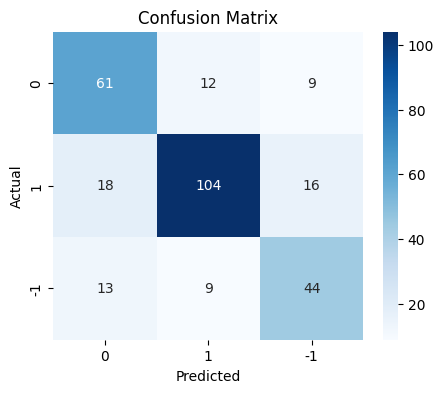

In [79]:
plot_confusion_matrix(tuned_wv,X_train_wv,y_train)

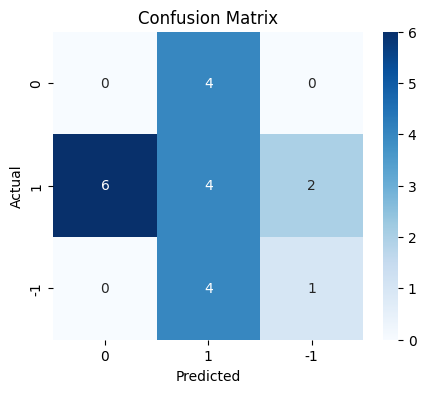

In [80]:
plot_confusion_matrix(tuned_wv,X_val_wv,y_val)

In [81]:
#Calculating different metrics on training data
tuned_train_wv=model_performance_classification_sklearn(tuned_wv,X_train_wv,y_train)
print("Training performance:\n",tuned_train_wv)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.730769  0.730769   0.738715  0.733067


In [82]:
#Calculating different metrics on validation data
tuned_val_wv = model_performance_classification_sklearn(tuned_wv,X_val_wv,y_val)
print("Validation performance:\n",tuned_val_wv)

Validation performance:
    Accuracy    Recall  Precision    F1
0  0.238095  0.238095   0.269841  0.25


### Tuned Model - GloVe

In [83]:
start = time.time()

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) #Complete the code to pass the chosen model
grid_obj = grid_obj.fit(X_train_gl, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_gl = grid_obj.best_estimator_

Time taken  112.21569442749023


In [84]:
# Fit the best algorithm to the data.
tuned_gl.fit(X_train_gl, y_train) #Complete the code to fit the chosen model on the train data

RandomForestClassifier(max_depth=6, max_features=0.2, min_samples_split=7,
                       random_state=42)

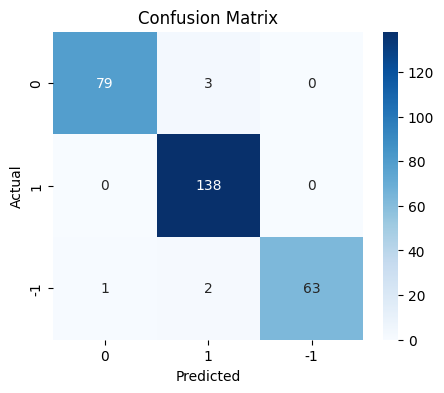

In [85]:
plot_confusion_matrix(tuned_gl, X_train_gl, y_train) #Complete the code to plot the confusion matrix for the train data

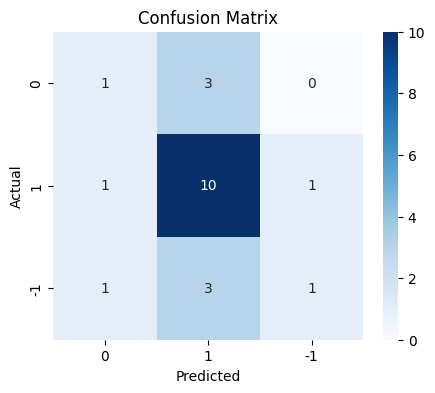

In [86]:
plot_confusion_matrix(tuned_gl, X_val_gl, y_val) #Complete the code to plot the confusion matrix for the validation data

In [87]:
#Calculating different metrics on training data
tuned_train_gl=model_performance_classification_sklearn(tuned_gl, X_train_gl, y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n",tuned_train_gl)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.979021  0.979021   0.979545  0.978968


In [88]:
#Calculating different metrics on validation data
tuned_val_gl = model_performance_classification_sklearn(tuned_gl, X_val_gl, y_val) #Complete the code to compute the model performance for the validation data
print("Validation performance:\n",tuned_val_gl)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.571429  0.571429   0.539683  0.530612


### Tuned Model - Sentence Transformer

In [89]:
start = time.time()

# Choose the type of classifier.

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) #Complete the code to pass the chosen model
grid_obj = grid_obj.fit(X_train_st, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_st = grid_obj.best_estimator_

Time taken  223.1237449645996


In [90]:
# Fit the best algorithm to the data.
tuned_st.fit(X_train_st, y_train) #Complete the code to fit the chosen model on the train data

RandomForestClassifier(max_depth=5, max_features=0.4, min_samples_split=9,
                       random_state=42)

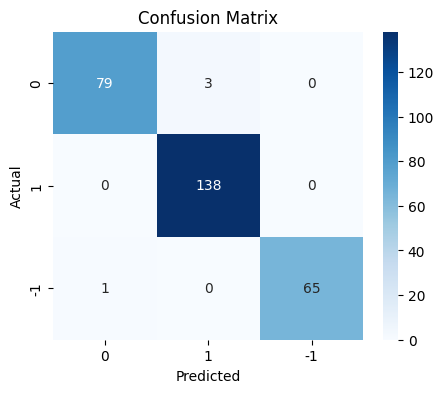

In [91]:
plot_confusion_matrix(tuned_st, X_train_st, y_train) #Complete the code to plot the confusion matrix for the train data

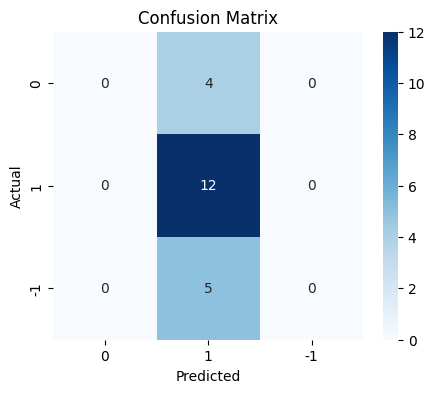

In [92]:
plot_confusion_matrix(tuned_st, X_val_st, y_val) #Complete the code to plot the confusion matrix for the validation data

In [93]:
#Calculating different metrics on training data
tuned_train_st=model_performance_classification_sklearn(tuned_st, X_train_st, y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n",tuned_train_st)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.986014  0.986014    0.98615  0.985971


In [94]:
#Calculating different metrics on validation data
tuned_val_st = model_performance_classification_sklearn(tuned_st, X_val_st, y_val) #Complete the code to compute the model performance for the validation data
print("Validation performance:\n",tuned_val_st)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.571429  0.571429   0.326531  0.415584


### Model Performance Summary and Final Model Selection

In [95]:
#training performance comparison

models_train_comp_df = pd.concat(
    [base_train_wv.T,
     base_train_gl.T,
     base_train_st.T,
     tuned_train_wv.T,
     tuned_train_gl.T,
     tuned_train_st.T,
    ],axis=1
)

models_train_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,1.0,1.0,1.0,0.730769,0.979021,0.986014
Recall,1.0,1.0,1.0,0.730769,0.979021,0.986014
Precision,1.0,1.0,1.0,0.738715,0.979545,0.986150
F1,1.0,1.0,1.0,0.733067,0.978968,0.985971


In [96]:
#validation performance comparison

models_val_comp_df = pd.concat(
    [base_val_wv.T,
     base_val_gl.T,
     base_val_st.T,
     tuned_val_wv.T,
     tuned_val_gl.T,
     tuned_val_st.T,
     ],axis=1
)

models_val_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,0.285714,0.428571,0.523810,0.238095,0.571429,0.571429
Recall,0.285714,0.428571,0.523810,0.238095,0.571429,0.571429
Precision,0.326077,0.458503,0.443537,0.269841,0.539683,0.326531
F1,0.299698,0.438672,0.480260,0.250000,0.530612,0.415584


### Model Performance Check on Test Data

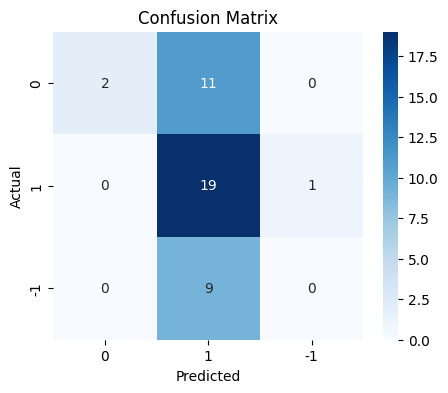

In [97]:
plot_confusion_matrix(tuned_st, X_test_st, y_test) #Complete the code to plot the confusion matrix for the final model and test data

In [98]:
#Calculating different metrics on training data
final_model_test = model_performance_classification_sklearn(tuned_st, X_test_st, y_test) #Complete the code to compute the final model's performance for the test data
print("Test performance for the final model:\n",final_model_test)

Test performance for the final model:
    Accuracy  Recall  Precision        F1
0       0.5     0.5   0.541514  0.389239


## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 139.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 103.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 164.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
langchain 0.3.7 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.1.3 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.1.3 which

In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the data

In [1]:
# Importing the library for data manipulation
import pandas as pd

stock_news = pd.read_csv("/content/stock_news (4).csv") #Complete the code to load the dataset

In [2]:
data = stock_news.copy()

#### Loading the model

In [3]:
!pip install huggingface_hub # Install the necessary library

from huggingface_hub import hf_hub_download # Import the function from the library

model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"


model_path = hf_hub_download(
    repo_id=model_name_or_path, # Complete the code to mention the repo_id
    filename=model_basename # Complete the code to mention the filename
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
!pip install llama-cpp-python
from llama_cpp import Llama

#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path, # Path to the model
    n_gpu_layers=100, #Number of layers transferred to GPU
    n_ctx=4500, #Context window
)

In [43]:
# uncomment and run the following code in case GPU is not being used

# llm = Llama(
#     model_path=model_path,
#     n_ctx=4500, # Context window
#     n_cores=-2 # Number of CPU cores to use
# )

#### Aggregating the data weekly

In [46]:
import pandas as pd # Import the pandas library
import os

# Get the current working directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

# Construct the full path to the CSV file
file_path = os.path.join(current_directory, '/content/stock_news (4).csv')

# Check if the file exists
if os.path.exists(file_path):
    # If the file exists, read it into a DataFrame
    data = pd.read_csv(file_path)  # Load your data into a DataFrame called 'data'

    data["Date"] = pd.to_datetime(data["Date"])  # Convert the 'Date' column to datetime format,
    # Group the date by week using the 'Data' column,
    weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

    # Aggregrate the grouped data on a weekly bases;
    # concatenate 'content' values into a single sring separated by '||'.
    weekly_grouped = weekly_grouped.agg(
        {
            'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
        }  # The closing curly brace '}' is now aligned with 'weekly_grouped = weekly_grouped.agg('
    ).reset_index()

    print(weekly_grouped.shape)
else:
    # If the file does not exist, print an error message
    print(f"Error: The file 'your_data.csv' was not found in the current directory: {current_directory}")
    print("Please ensure the file is present or provide the correct file path.")

Current working directory: /content
(18, 2)


In [47]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

In [48]:
# Aggregate the grouped data on a weekly basis:
# concatenate 'content' values into a single string separated by ' || '.
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [49]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [50]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [51]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [60]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=400, #Complete the code to set the maximum number of tokens the model should generate for this task.
      temperature=0.05, #Complete the code to set the value for temperature.
      top_p=0.9, #Complete the code to set the value for top_p
      top_k=40, #Complete the code to set the value for top_k
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

##### Checking the model output on a sample

In [53]:
import pandas as pd

# Load your data into a pandas DataFrame
data_1 = pd.read_csv('/content/stock_news (4).csv')

# Check if 'Key_Events' column exists. If not, check for similar column names.
if 'Key_Events' not in data_1.columns:
    print("Column 'Key_Events' not found. Available columns:", data_1.columns)
    # If there's a typo, correct the column name. For example:
    # if 'key_events' in data_1.columns:
    #     data_1 = data_1.rename(columns={'key_events': 'Key_Events'})
else:
    # Access the 'Key_Events' column and get its shape
    print(data_1["Key_Events"].shape) # .shape is an attribute, not a function

Column 'Key_Events' not found. Available columns: Index(['Date', 'News', 'Open', 'High', 'Low', 'Close', 'Volume', 'Label'], dtype='object')


In [54]:
import pandas as pd

# Ensure data_1 is defined in this cell
data_1 = pd.read_csv('/content/stock_news (4).csv')

news = data_1.loc[0, 'News']

In [55]:
print(len(news.split(' ')))
news

46


" The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January."

In [56]:
#Complete the code to define the prompt for this task
prompt = """
    <wrtie your prompt here>
"""

In [59]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): Traceback (most recent call last):
  File "/usr/local/bin/huggingface-cli", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/huggingface_hub/commands/huggingface_cli.py", line 57, in main
    service.run()
  File "/usr/local/lib/python

In [65]:
%%time
summary = response_mistral_1(prompt, news)
print(summary)

NameError: name 'llm' is not defined

##### Checking the model output on the weekly data

##### Formatting the model output

In [ ]:
data_1['model_response_parsed'] = data_1['Key Events'].apply(extract_json_data)
data_1.head()

In [ ]:
model_response_parsed = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed.head()

In [ ]:
final_output = pd.concat([data_1.reset_index(drop=True),model_response_parsed],axis=1)
final_output.drop(['Key Events','model_response_parsed'], axis=1, inplace=True)
final_output.columns = ['Week End Date', 'News', 'Week Positive Events', 'Week Negative Events']

final_output.head()

## **Conclusions and Recommendations**

-



<font size=6 color='blue'>Power Ahead</font>
___